In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


file_path = r'C:\Users\vamshi krishna\Downloads\All_India_Index_Upto_Nov23.csv'
data = pd.read_csv(file_path)


print("First few rows of the dataset:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

print("\nInformation about the dataset:")
print(data.info())

print(data.shape)

First few rows of the dataset:
        Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
0        Rural  2013   January                 107.5          106.3  108.1   
1        Urban  2013   January                 110.5          109.1  113.0   
2  Rural+Urban  2013   January                 108.4          107.3  110.0   
3        Rural  2013  February                 109.2          108.7  110.2   
4        Urban  2013  February                 112.9          112.9  116.9   

   Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
0              104.9          106.1   103.9       101.9  ...      NaN   
1              103.6          103.4   102.3       102.9  ...    100.3   
2              104.4          105.1   103.2       102.2  ...    100.3   
3              105.4          106.7   104.0       102.4  ...      NaN   
4              104.0          103.5   103.1       104.9  ...    100.4   

   Fuel and light  Household goods and services  Health  \
0 

In [9]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    print(f'\nStatistics for {col}:')
    print(f'Mean: {data[col].mean()}')
    print(f'Median: {data[col].median()}')
    print(f'Standard Deviation: {data[col].std()}')
    print(f'Skewness: {skew(data[col].dropna())}')
    print(f'Kurtosis: {kurtosis(data[col].dropna())}')


Statistics for Year:
Mean: 2017.9538461538461
Median: 2018.0
Standard Deviation: 3.1586862449048714
Skewness: 0.01302150614419267
Kurtosis: -1.2241791538471913

Statistics for Cereals and products:
Mean: 138.70180878552972
Median: 136.6
Standard Deviation: 17.277010746849758
Skewness: 0.7567833689499454
Kurtosis: 0.11933891824491871

Statistics for Meat and fish:
Mean: 159.1638020833333
Median: 145.7
Standard Deviation: 35.10658098314705
Skewness: 0.44152992696582755
Kurtosis: -1.2659453406838062

Statistics for Egg:
Mean: 142.79870801033593
Median: 136.7
Standard Deviation: 23.81718092333197
Skewness: 0.45453823245980907
Kurtosis: -1.0539663432869273

Statistics for Milk and products:
Mean: 142.22739018087856
Median: 141.6
Standard Deviation: 19.889023039649704
Skewness: 0.14490133909110875
Kurtosis: -0.5888655770475917

Statistics for Oils and fats:
Mean: 133.502842377261
Median: 120.9
Standard Deviation: 29.91517138420894
Skewness: 0.9902691207169124
Kurtosis: -0.4365990405360938



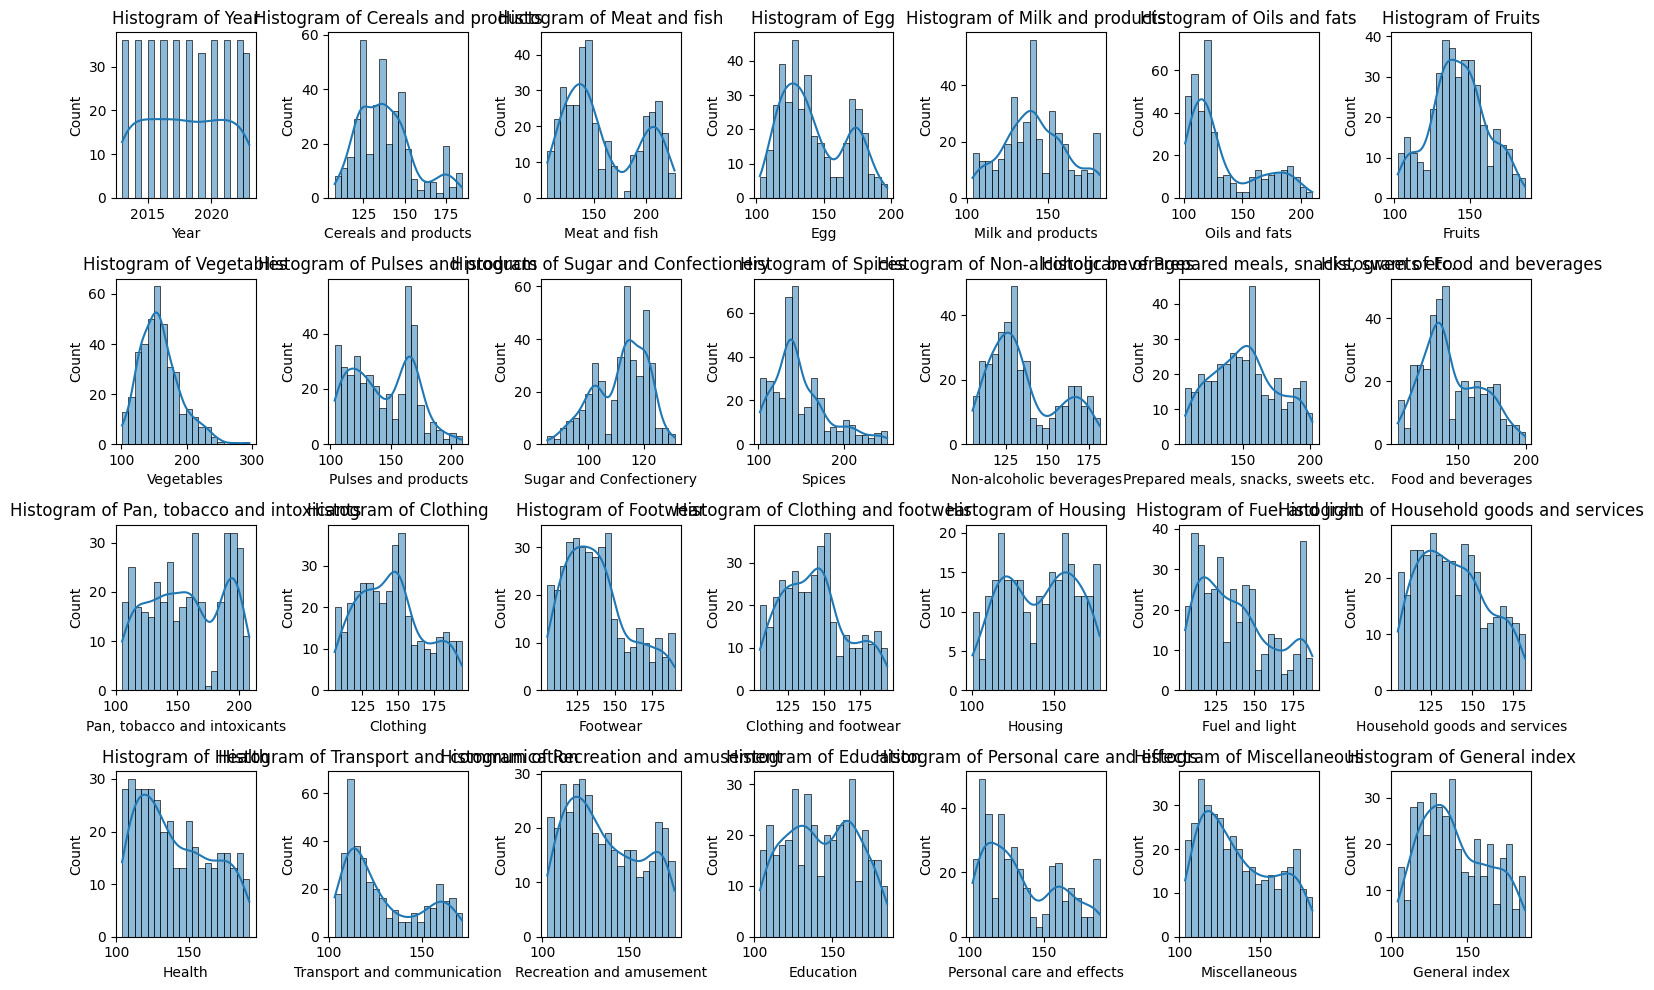

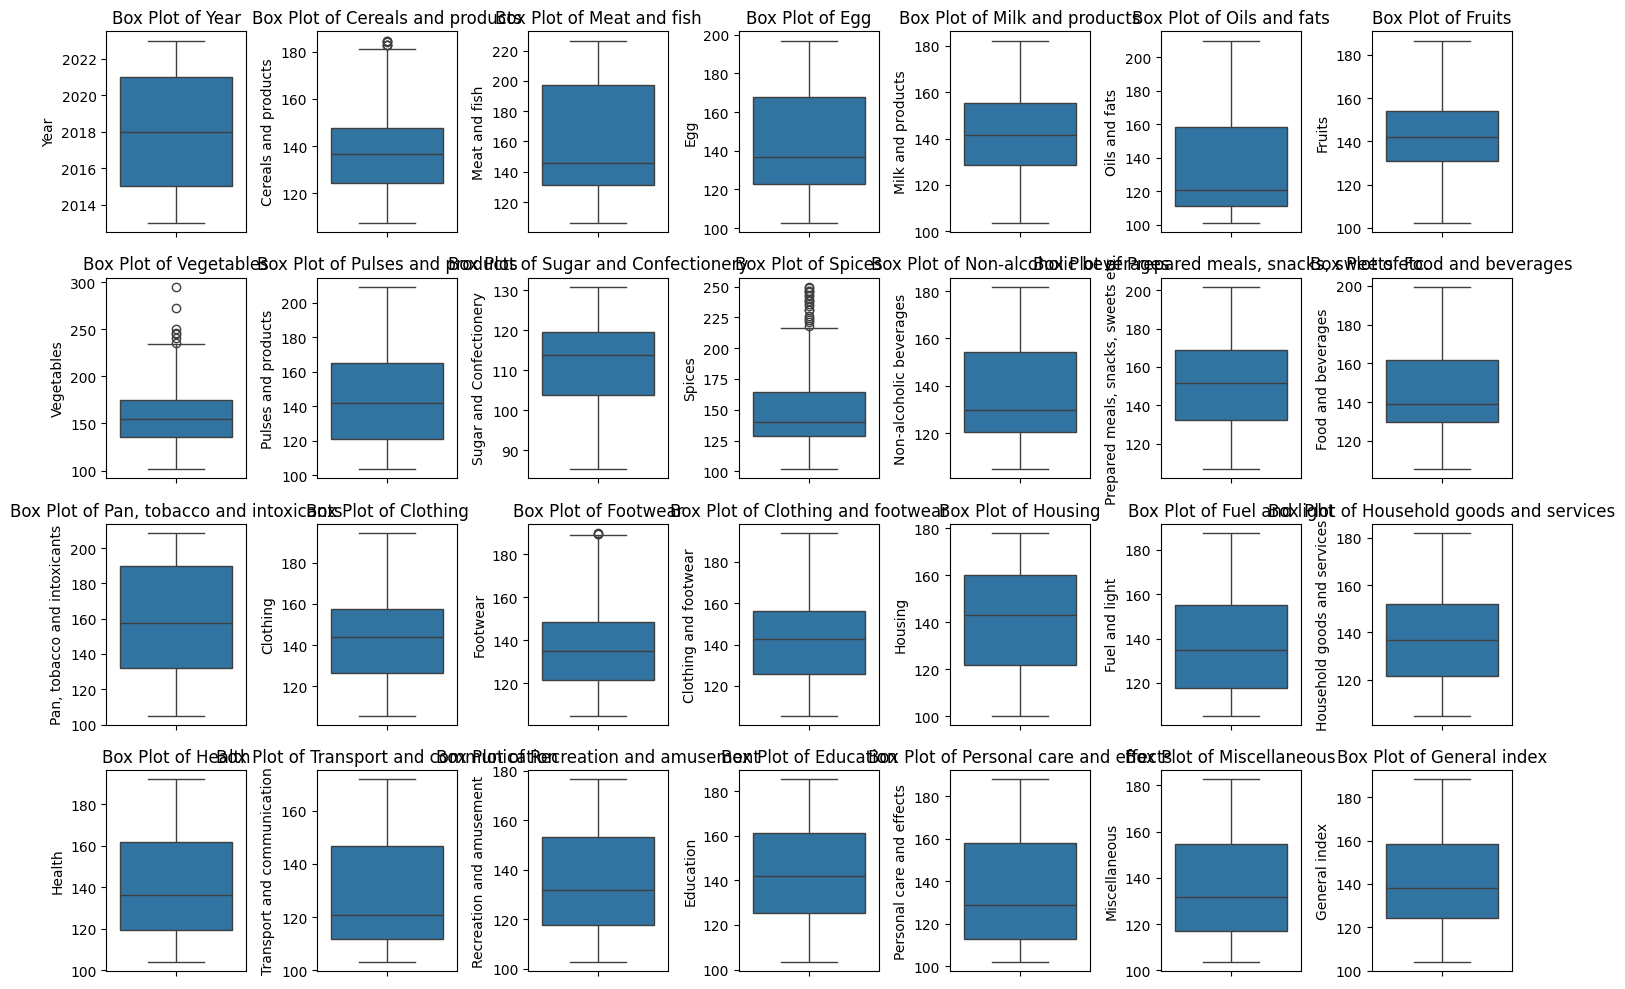

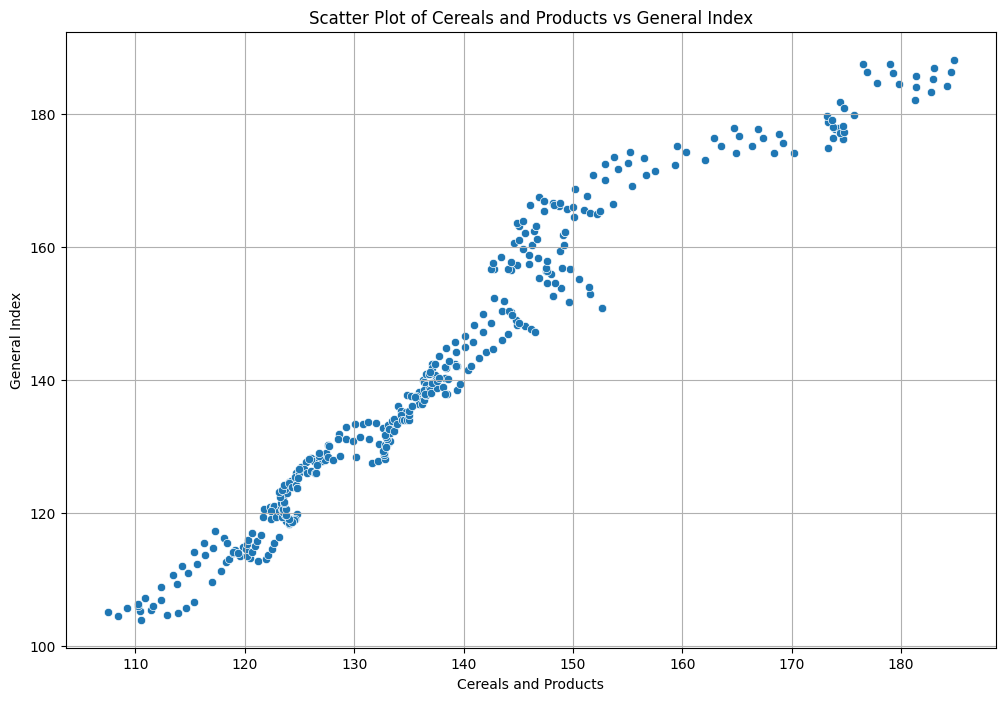

In [10]:

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
#Histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 7, i)  
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

 #Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 7, i)  
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Cereals and products', y='General index')  
plt.title('Scatter Plot of Cereals and Products vs General Index')
plt.xlabel('Cereals and Products')
plt.ylabel('General Index')
plt.grid()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

data = pd.read_csv(r"C:\Users\vamshi krishna\Downloads\All_India_Index_Upto_Nov23.csv")
data.dropna(inplace=True)

print("\nMissing values in the dataset after removing NaNs:")
print(data.isnull().sum())

# Select relevant columns for regression
X = data[['Cereals and products', 'Housing']]  
y = data['General index']                        


print("\nData types of features and target:")
print(X.dtypes)
print(y.dtypes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check shapes of training data
print("\nShapes of training data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
print("\nLinear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R^2:", r2_score(y_test, y_pred_linear))

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_poly_test)
print("\nPolynomial Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R^2:", r2_score(y_test, y_pred_poly))

# 3. Ridge Regression
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
print("\nRidge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2:", r2_score(y_test, y_pred_ridge))

# 4. Lasso Regression
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Regression
print("\nLasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R^2:", r2_score(y_test, y_pred_lasso))

# 5. Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree Regression
print("\nDecision Tree Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R^2:", r2_score(y_test, y_pred_tree))

# 6. Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluate SVR
print("\nSupport Vector Regression (SVR)")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R^2:", r2_score(y_test, y_pred_svr))

# 7. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
print("\nRandom Forest Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))


Missing values in the dataset after removing NaNs:
Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Healt

Epoch 1/100


c:\Users\vamshi krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.9842 - val_loss: 0.5750
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5036 - val_loss: 0.3457
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3307 - val_loss: 0.2158
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2052 - val_loss: 0.1304
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1041 - val_loss: 0.0648
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0555 - val_loss: 0.0252
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - val_loss: 0.0169
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - val_loss: 0.0200
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - val_loss: 0.0145
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - val_loss: 0.0119
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 13/100

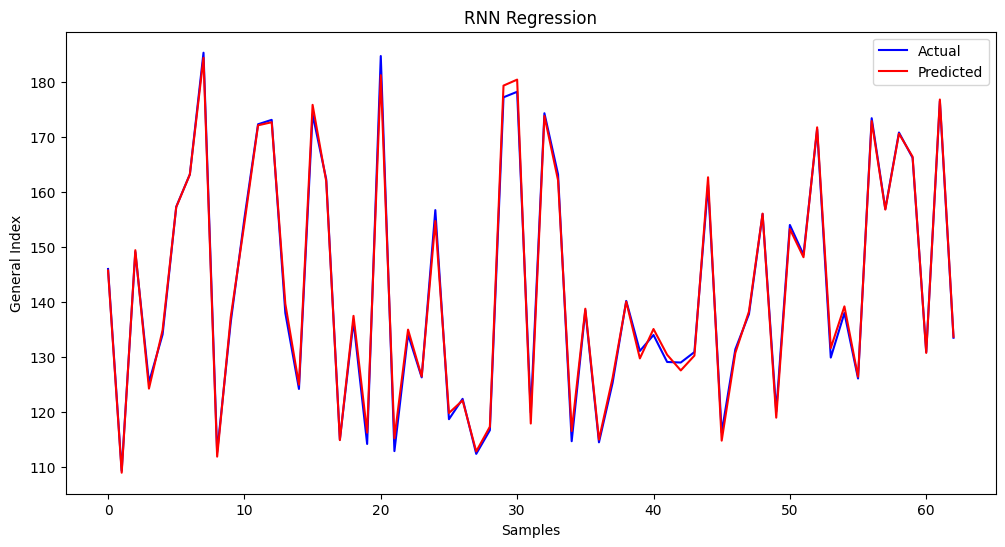

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5 
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.25, random_state=42)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, X.shape[1])))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

history = rnn_model.fit(X_train_seq, y_train_seq, epochs=100, validation_split=0.2, verbose=1)

y_pred_scaled_seq = rnn_model.predict(X_test_seq)
y_pred_seq = scaler_y.inverse_transform(y_pred_scaled_seq)

y_test_original_seq = scaler_y.inverse_transform(y_test_seq)

print("\nRNN Regression")
print("MAE:", mean_absolute_error(y_test_original_seq, y_pred_seq))
print("MSE:", mean_squared_error(y_test_original_seq, y_pred_seq))
print("R^2:", r2_score(y_test_original_seq, y_pred_seq))


plt.figure(figsize=(12, 6))
plt.plot(y_test_original_seq, color='blue', label='Actual')
plt.plot(y_pred_seq, color='red', label='Predicted')
plt.title('RNN Regression')
plt.xlabel('Samples')
plt.ylabel('General Index')
plt.legend()
plt.show()

Epoch 1/100


c:\Users\vamshi krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.7231 - val_loss: 0.6066
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6516 - val_loss: 0.4671
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5185 - val_loss: 0.3385
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3278 - val_loss: 0.2189
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1953 - val_loss: 0.1188
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1086 - val_loss: 0.0637
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0521 - val_loss: 0.0524
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - val_loss: 0.0380
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0338
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0359 - val_loss: 0.0294
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0306 - val_loss: 0.0263
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0239 - val_loss: 0.0240
Epoch 13/100

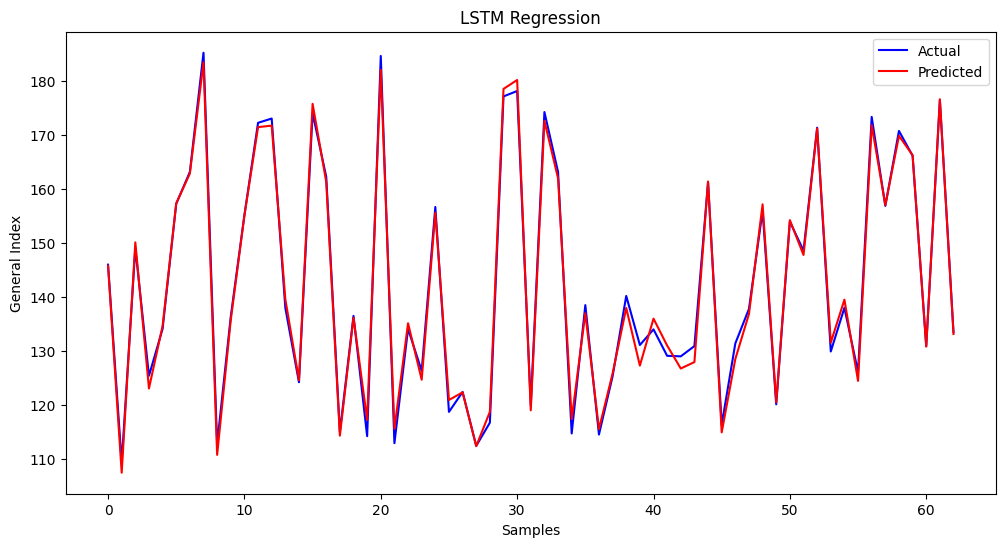

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

history = lstm_model.fit(X_train_seq, y_train_seq, epochs=100, validation_split=0.2, verbose=1)

y_pred_scaled_seq = lstm_model.predict(X_test_seq)
y_pred_seq = scaler_y.inverse_transform(y_pred_scaled_seq)

y_test_original_seq = scaler_y.inverse_transform(y_test_seq)

print("\nLSTM Regression")
print("MAE:", mean_absolute_error(y_test_original_seq, y_pred_seq))
print("MSE:", mean_squared_error(y_test_original_seq, y_pred_seq))
print("R^2:", r2_score(y_test_original_seq, y_pred_seq))

plt.figure(figsize=(12, 6))
plt.plot(y_test_original_seq, color='blue', label='Actual')
plt.plot(y_pred_seq, color='red', label='Predicted')
plt.title('LSTM Regression')
plt.xlabel('Samples')
plt.ylabel('General Index')
plt.legend()
plt.show()